특성선택(Feature Selection)
  - 학습시간 단축
  - 모델을 단순화하고 더 쉽게 해석할수 있도록
  - 과적합을 줄여 테스트 세트 성능 향상

특성삭제
  - 입력변수간의 높은 상관관계, 중복성, 특정 특성의 무관련성


특성의 중요도
  - 머신러닝을 이용해서 파악
  - 엑스트라 트리기반의 분류기를 이용해서 상위 5개의 특성을 결정

In [1]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/train.csv'

In [2]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(filepath)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
0,842,0,2.2,0,1,0,7
1,1021,1,0.5,1,0,1,53
2,563,1,0.5,1,2,1,41
3,615,1,2.5,0,0,0,10
4,1821,1,1.2,0,13,1,44


In [4]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

[0.28563788 0.04797995 0.2220897  0.12608367 0.03879104 0.27941776]


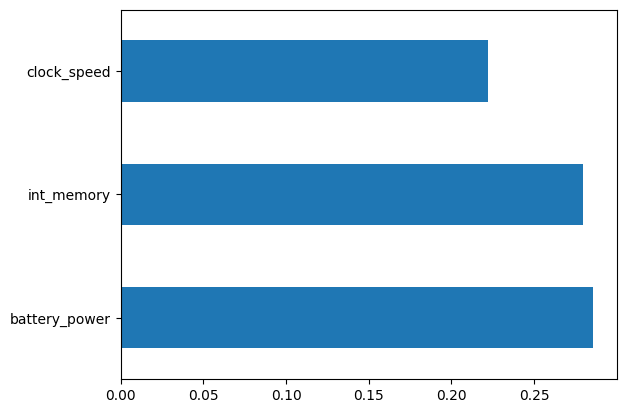

In [5]:
from sklearn.tree import ExtraTreeClassifier
X = data.drop(columns=['dual_sim'])
y = data['dual_sim']
model = ExtraTreeClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeature =  SelectKBest(score_func=chi2, k=3)  # 상위3개

fit = bestfeature.fit(X,y)
dfscores =  pd.DataFrame(fit.scores_)

In [7]:
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
#상위 3개의 특성을 출력
scores.nlargest(3,'score')

,specs,score
0,battery_power,545.747721
3,fc,7.415152
5,int_memory,5.049112


상관관계(-1과 1사이의 연속적인 값) 히트맵

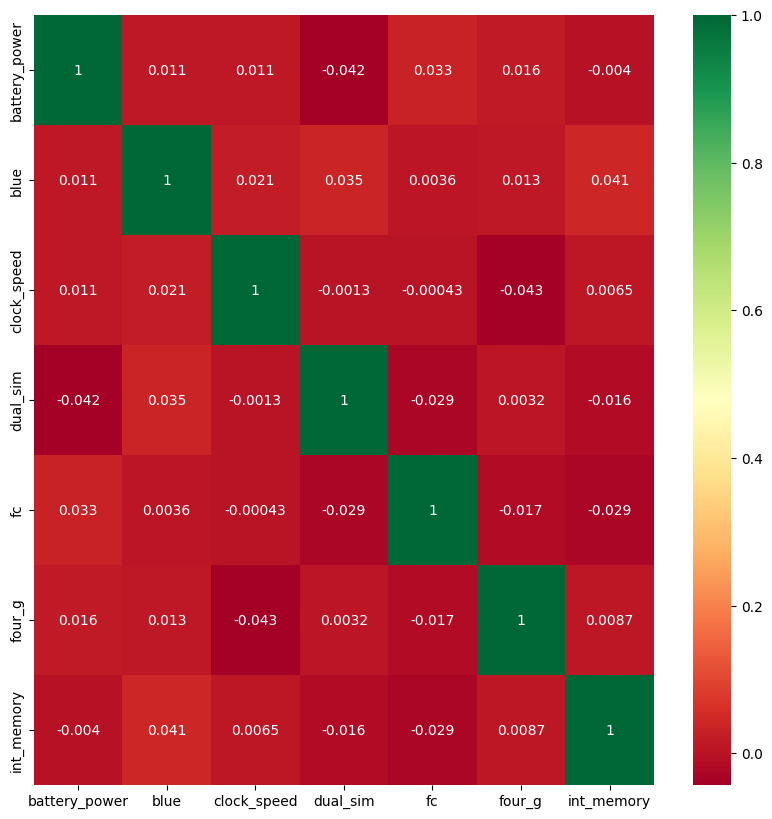

In [8]:
import seaborn as sns

correlation_matrix =  data.corr()
plt.figure(figsize=(10,10))
# 히트맵을 출력
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlGn')
plt.show()


특성을 자동선택하는 방법
  - 래퍼기반 방법
    - 1. 특성의 하위 집합을 사용해 모델을 훈련
    - 2. 각 반복의 결과에 따라 특성이 하위 집합에 추가되거나 제거된다
  - 필터 기반 방법
    - 지표를 설정하고 해당 지표를 기반으로 특성을 필터링
      - 피어슨 상관관계 - heatmap
      - 선형판별 분석 - 범주형 변수에서 두 개 이상의 레벨에서 특성을 뽑거나 분리하는 선형 조합
      - 분산분석(ANOVA) - 여러그룹의 평균이 같은지 여부를 알려주는 통계테스트      
      - 카이제곱 - 범주형 변수그룹에 적용되는 통계 테스트
  - 임베디드 방법
    - 머시러닝을 이용한 방법 : 랏소회귀, 릿지회귀,등등

도메인지식없이 일반적인 방법으로 특성공학
  - 대치(결측치 처리)
  - 이상치 관리
  - 원-핫인코딩
  - 로그 변환
  - 스케일링
  - 날자처리

In [9]:
# 결측치가 있는 행을제거
# 임계값 기준으로 삭제
threshold = 0.6
# 임계값보다 높은 비율의 결측치를 갖는 열을 삭제

# data = data[data.columns[data.isnull().mean() < threshold]]
data = data.loc[data.isnull().mean(axis=1) < threshold]

In [10]:
# 결측치를 모두 0으로 대처
data = data.fillna(0)

# 결측치를 열의 중앙값으로 대처
data = data.fillna(data.mean())

범주형 데이터의 결측치 대치

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/dataset.csv')
data['color'].fillna( data['color'].value_counts().idxmax(), inplace=True)

이상치 관리
  - 주택가격 예로 생각
    - 가격결정요소
      - 침실의개수
      - 주방
      - 평수
      - 화장실개수

In [12]:
# 이상치를제거하는 방법
# 표준편차를구하고 구한 표준편차의 특정 배수에 해당하는 이상치를 제거 (2~4) 값으로 제거

In [13]:
# 수치형 데이터
data = pd.read_csv(filepath)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000


<Axes: >

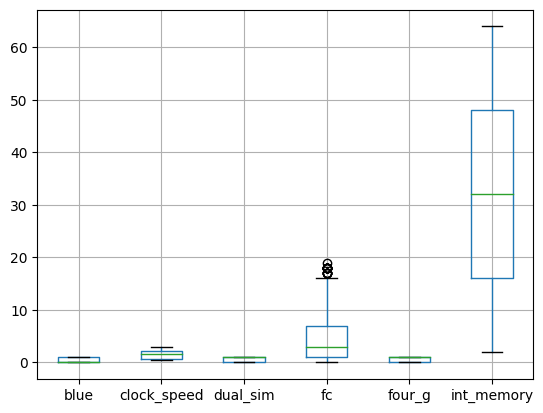

In [14]:
data.iloc[:,1:].boxplot()

<Axes: >

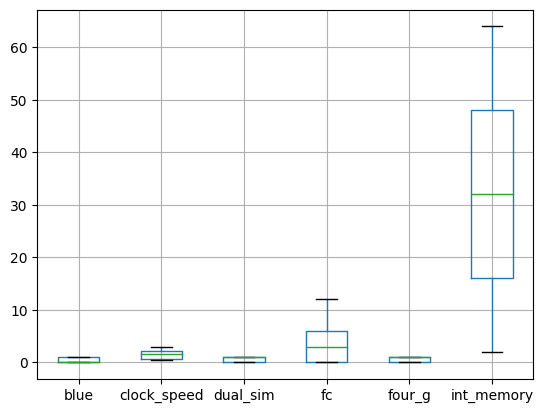

In [15]:
#표준편차를 이용한 이상치 제거
factor = 2
upper_limit = data['fc'].mean() +  data['fc'].std()*factor
lower_limit = data['fc'].mean() -  data['fc'].std()*factor
data = data[(lower_limit < data['fc']) & (data['fc'] < upper_limit)]
data.iloc[:,1:].boxplot()

<Axes: >

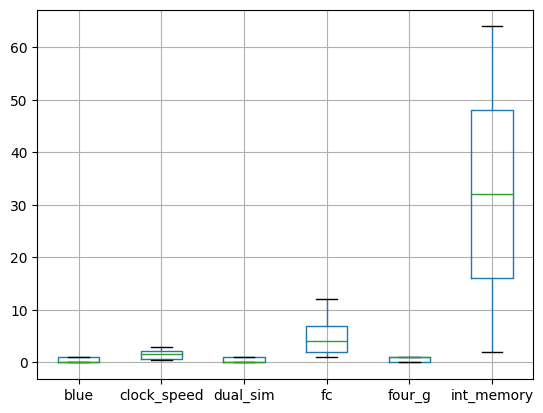

In [16]:
# 백분위수( 상위 99 ~ 하위 1)
data = pd.read_csv(filepath)
upper_limit = data['fc'].quantile(0.95)
lower_limit = data['fc'].quantile(0.05)
data = data[(lower_limit < data['fc']) & (data['fc'] < upper_limit)]
data.iloc[:,1:].boxplot()

<Axes: >

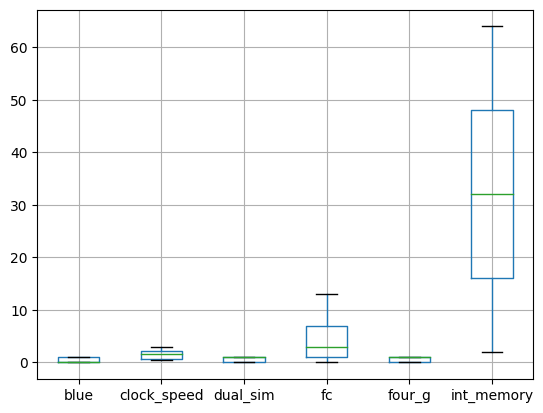

In [17]:
# 삭제 대신에 제한하는 방법
# 백분위 수로 이상치 행 제한
data = pd.read_csv(filepath)
upper_limit = data['fc'].quantile(0.95)
lower_limit = data['fc'].quantile(0.05)

data.loc[data['fc'] < lower_limit,'fc'] = lower_limit
data.loc[data['fc'] > upper_limit,'fc'] = upper_limit

data.iloc[:,1:].boxplot()


In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/dataset.csv')
data['color'].fillna( data['color'].value_counts().idxmax(),inplace=True)
# pd.concat([data, pd.get_dummies(data['color'])],axis=1).drop(columns =  'color')
data.join(pd.get_dummies(data['color'])).drop(columns =  'color')

,index,black,green,purple,red,white,yellow
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1
2,2,0,0,0,1,0,0
3,3,0,0,0,1,0,0
4,4,0,0,1,0,0,0
5,5,0,0,0,1,0,0
6,6,0,0,0,1,0,0
7,7,0,0,1,0,0,0
8,8,0,0,0,1,0,0
9,9,0,0,0,1,0,0


로그변환
  - 지나치게 한쪽으로 치우쳐진 데이터에 적용
  - 데이터 분포가 정규화 된다
  - 모든데이터가 양수일때만 로그변환, 적용하기전에 데이터에 1을 더해 출력이 양수가 되도록 한다 log(x+1)
  - 15,10의 차이와 55와 50의 차이는

In [19]:
# 로그변환
data = pd.DataFrame({'value':[3,67,-17,44,37,3,31,-38]})
data['log+1']  = (data['value']+1).transform(np.log)

# 음수처리
# 값이 다른 것을 출력
data['log'] = (data['value']-data['value'].min()+1).transform(np.log)
data

,value,log+1,log
0,3,1.386294,3.737670
1,67,4.219508,4.663439
2,-17,NaN,3.091042
3,44,3.806662,4.418841
4,37,3.637586,4.330733
5,3,1.386294,3.737670
6,31,3.465736,4.248495
7,-38,NaN,0.000000


스케일링
  - 정규화(최대 최소) - 0~1사이
  - 표준화 : 평균과 표준편차

In [20]:
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
data

,value,log+1,log,normalized,standardized
0,3,1.386294,3.737670,0.390476,-0.382643
1,67,4.219508,4.663439,1.000000,1.465593
2,-17,NaN,3.091042,0.200000,-0.960216
3,44,3.806662,4.418841,0.780952,0.801384
4,37,3.637586,4.330733,0.714286,0.599233
5,3,1.386294,3.737670,0.390476,-0.382643
6,31,3.465736,4.248495,0.657143,0.425961
7,-38,NaN,0.000000,0.000000,-1.566669


날자처리
  - 도메인지식을 이용(임대료)
  - 매월 5일 이전 = 1, 매월 5일 이후 = 0
  - 날자를 다른구성요소로 나눈다(연,월,일)
  - 차이(현재날자와 해당 값사이의 기간)
  - 요일(0,1,2,3..)
  - 주말이나 공휴일 구분

지도학습 , 비 지도학습

지도학습을 이용한 분류와 회귀

데이터 전처리

In [21]:
input_data = np.array([
    [5.1,-2.9,3.3],
    [-1.2,7.8,-6.1],
    [3.9,0.4,2.1],
    [7.3,-9.9,-4.5]
])
input_data

array([[ 5.1, -2.9,  3.3],
       [-1.2,  7.8, -6.1],
       [ 3.9,  0.4,  2.1],
       [ 7.3, -9.9, -4.5]])

이진화
  - 숫자값을 불리언 값으로 변환
  - 특정 임계값을 기준으로 0 1

In [22]:
from sklearn.preprocessing import Binarizer
data_binarizer = Binarizer(threshold=2.1).transform(input_data)
data_binarizer

array([[1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

평균제거
  - 일반적인 특성벡터에서 평균을 제거하면 각 특성이 0을 중심으로 분포하도록 만든
  - 특성벡터에서 편향을 제거

In [23]:
# 평균과 표준편차
print(f"mean = {input_data.mean(axis=0)}")
print(f"std = {input_data.std(axis=0)}")

mean = [ 3.775 -1.15  -1.3  ]
std = [3.12039661 6.36651396 4.0620192 ]


In [24]:
# 평균제거 ( 평균은 0에 가깝고 표준편차 1)
from sklearn import preprocessing
data_scaled =  preprocessing.scale(input_data)
print(f"mean = {data_scaled.mean(axis=0)}")
print(f"std = {data_scaled.std(axis=0)}")


mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
std = [1. 1. 1.]


스케일링
  - min max를 이용.. MinMaxScaler
  - (X - min) / (max-min)  

In [25]:
# 최대-최소 스케일링 - 각 행의 최대값은 1이고 모든 값은 1을 기준으로 조정된다
data_scaler_minmax =  preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax =  data_scaler_minmax.fit_transform(input_data)
data_scaled_minmax

array([[0.74117647, 0.39548023, 1.        ],
       [0.        , 1.        , 0.        ],
       [0.6       , 0.5819209 , 0.87234043],
       [1.        , 0.        , 0.17021277]])

- 스케일링 : 데이터의 범위를 통일
- 정규화 : 데이터의 분포되는 모양을 변경
- 머신러닝이 잘 동작하려면 데이터가 정규분포형태의 모양을 취하고 있어야 함
- L1 정규화 : 절대값 의 합이 1이 되도록 조정
- L2 정규화 : 제곱의 합이 1이 되도록 조정
- L1 정규화가 더 강력한 기술 - 이상치에 대한 내성

In [26]:
data_normalized_l1 = preprocessing.normalize(input_data, norm = 'l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm = 'l2')
data_normalized_l1, data_normalized_l2

(array([[ 0.45132743, -0.25663717,  0.2920354 ],
        [-0.0794702 ,  0.51655629, -0.40397351],
        [ 0.609375  ,  0.0625    ,  0.328125  ],
        [ 0.33640553, -0.4562212 , -0.20737327]]),
 array([[ 0.75765788, -0.43082507,  0.49024922],
        [-0.12030718,  0.78199664, -0.61156148],
        [ 0.87690281,  0.08993875,  0.47217844],
        [ 0.55734935, -0.75585734, -0.34357152]]))

레이블 인코딩

In [27]:
input_label = ['red','green','blue']
encoder = preprocessing.LabelEncoder()
encoder.fit(input_label)
print(encoder.classes_)
encoder.transform(input_label)

['blue' 'green' 'red']


array([2, 1, 0])

로지스틱 회귀 분리
  - 로지스틱함수를 사용해서 확률을 추정하고 독립변수와 종속변수의 관계를 찾는게
  - 대표적인 로지스틱함수에는 시그모이드
    - 0, 1사이로 제한
    - 미분을 계산하기 쉽게한다
    - 모델에 비선형을 도입하는 가장 간단한 방법




In [28]:
from sklearn import linear_model

In [29]:
from utilities import visualize_classifier

In [31]:
# 샘플 입력 데이터
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [34]:
# 분류기를 생성
classifier = linear_model.LogisticRegression(C=0.01)
# 훈련
classifier.fit(X,y)

LogisticRegression(C=0.01)

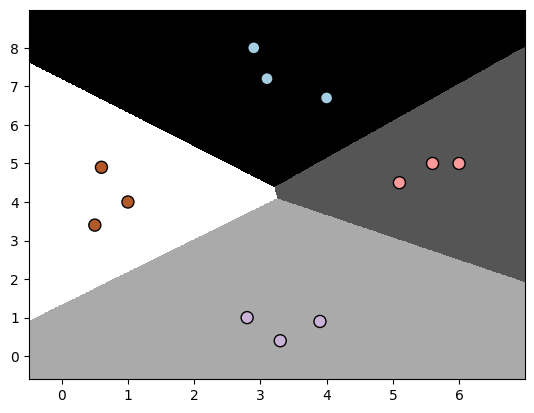

In [35]:
# 분류기의 성능을 시각화
visualize_classifier(classifier,X,y)

나이브 베이즈 분류기
  - 베이즈 정리를 사용해서 분류기를 구축하는데 사용하는 기술
  - 베이즈 정리는 이벤트와 관련된 다양한 조건에 따라서 이벤트가 발생할 확률을  설명
  - 주어진 특성을 독립적으로 가정하고.. 이를 나이브라고 한다.
  - 동물 , 다리가 4개고 꼬리가 있고 시곡 약 110키로로 달린다...--> 치타
  - 나이브베이즈는 각 특성이 결과에 독립적으로 기여한다고 가정(각 변수간의 상관관계는 고려하지 않는다)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [37]:
# 데이터 로드
input_file = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/data_multivar_nb.txt'

In [38]:
data = np.loadtxt(input_file,delimiter=',')

In [40]:
X,y = data[:,:-1], data[:,-1]

In [ ]:
# 나이브 베이즈 분류기
# 나이브 베이즈에서 각 클래스에 관련된 값이 가우스 분포를 따른다고 가정
# 가우스 분포 : 정규분포라고도 불린다.


In [42]:
# 분류기
classifier = GaussianNB()
classifier.fit(X,y)

GaussianNB()

In [43]:
# 학습된 분류기로 예측
y_pred = classifier.predict(X)

In [44]:
# 분류기의 정화도
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9975

In [47]:
(y == y_pred).sum()/X.shape[0]

0.9975

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(x_train,y_train)
y_pred = classifier_new.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

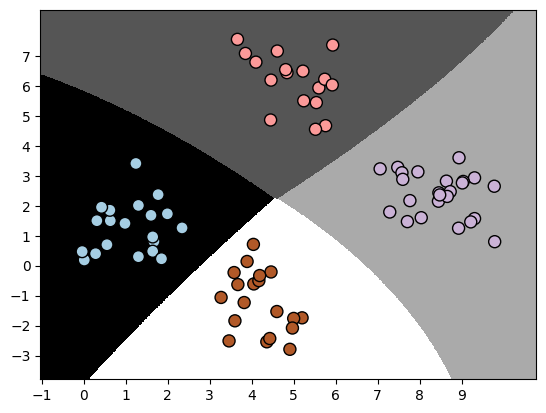

In [51]:
# 성능 시각화
visualize_classifier(classifier_new,x_test,y_test)

평가의 정확성을 높이기 위해서
  - confusion metrix

1, 0의 이진 분류일때

In [ ]:
# 0, 1 이진분류 사례
#